In [14]:
%pip install gdown
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install copy


ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy


In [15]:
# Anything above 2.10 is not supported on the GPU on Windows Native
!pip install "tensorflow<2.11"

ERROR: Could not find a version that satisfies the requirement tensorflow<2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow<2.11


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

In [17]:
from google.colab import drive


In [18]:
train_df = pd.read_pickle("/content/train_data.pickle")

In [19]:
DICT_SYMBOLS = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4}

In [20]:
class Puzzle:
    def __init__(self, data):
        self.start = list(data["start"])
        self.moves = copy.deepcopy(data.get("moves"))
        self.steps = copy.deepcopy(data.get("steps"))
        self.solution = list(data["solution"])
        self.score = data["score"]
        self.accepted_pair = data["accepted_pair"]

        self.padded_start = self.build_puzzle_to_end(self.start)
        self.padded_solution = self.build_puzzle_to_end(self.solution)

    def build_puzzle_to_end(self, puzzle):
        """Pad each row with '-' to match the longest row for visualization."""
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def plot_puzzle(self, puzzle, title):
        puzzle = self.build_puzzle_to_end(puzzle)
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle])
        rot_labels = np.rot90(puzzle_array, 1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(title)
        plt.axis("off")
        plt.show()

    def gearbox_score(self, puzzle, bonus=1.15):
        consensus = self.accepted_pair
        score = 0
        for col_ind in range(len(puzzle[0])):
            col_bonus = True
            col_tot = 0
            column_chars = [row[col_ind] for row in puzzle]
            for char in column_chars:
                if char == "-":
                    col_bonus = False
                    continue
                if char in consensus[col_ind]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        print(f"Total Gearbox Score: {score}")
        return score

    def _apply_step_to_puzzle(self, puzzle, step):
        """Apply a single step to the puzzle."""
        new_puzzle = puzzle.copy()
        row_index = step[0] - 1
        col_index = step[1]
        if row_index < 0 or row_index >= len(new_puzzle):
            return new_puzzle
        row_str = new_puzzle[row_index]
        if col_index < 0 or col_index > len(row_str):
            return new_puzzle
        new_row = row_str[:col_index] + '-' + row_str[col_index:]
        new_row = new_row[:len(row_str)]
        new_puzzle[row_index] = new_row
        return new_puzzle

    def apply_all_steps(self):
        """Apply all steps on a copy of the puzzle and plot states."""
        current_puzzle = list(self.start)
        updated_puzzles = []
        scores = []

        for step in self.steps:
            current_puzzle = self._apply_step_to_puzzle(current_puzzle, step)
            padded_current = self.build_puzzle_to_end(current_puzzle)
            score = self.gearbox_score(padded_current)
            updated_puzzles.append(padded_current)
            scores.append(score)

        n_steps = len(updated_puzzles)
        fig, axes = plt.subplots(1, n_steps, figsize=(4 * n_steps, 6))
        if n_steps == 1:
            axes = [axes]
        for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
            num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
            rot_num_puzzle = np.rot90(num_puzzle, 1)
            puzzle_array = np.array([list(row) for row in puzzle_state])
            rot_labels = np.rot90(puzzle_array, 1)
            ax = axes[idx]
            sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False, ax=ax)
            ax.set_title(f"Step {idx+1}\nScore: {score}")
            ax.axis("off")
        plt.tight_layout()
        plt.show()
        return current_puzzle

In [21]:
# Create puzzle
puzzle_data = {
    'start': train_df.iloc[-1]['start'],
    'moves': train_df.iloc[-1].get('moves'),
    'steps': train_df.iloc[-1].get('steps'),
    'solution': train_df.iloc[-1]['solution'],
    'score': train_df.iloc[-1]['score'],
    'accepted_pair': train_df.iloc[-1]['accepted_pair']
}
puzzle = Puzzle(puzzle_data)

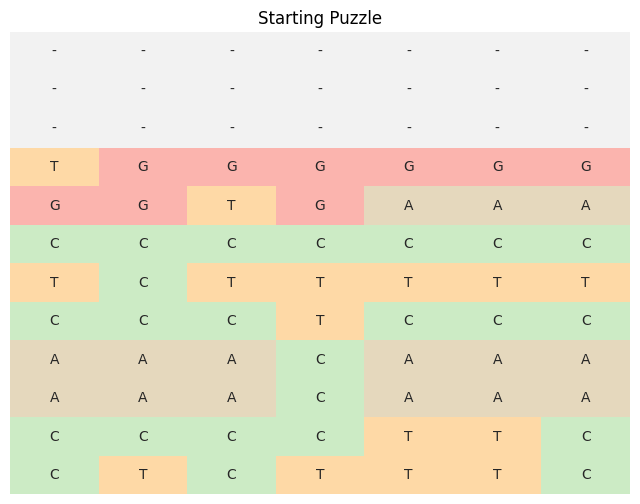

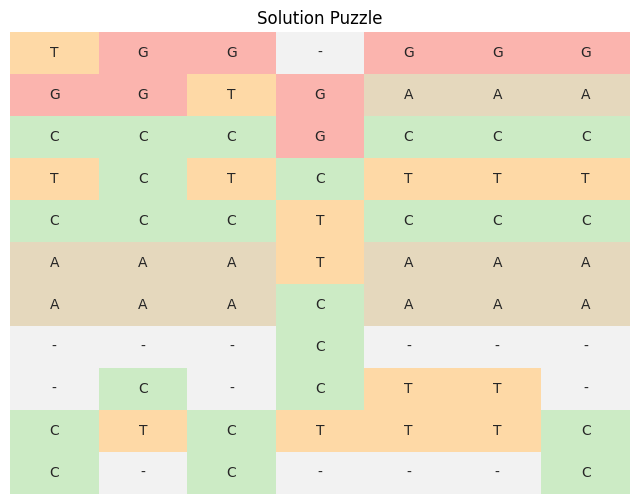

In [22]:
puzzle.plot_puzzle(puzzle.start, "Starting Puzzle")
puzzle.plot_puzzle(puzzle.solution, "Solution Puzzle")


Total Gearbox Score: 33.099999999999994
Total Gearbox Score: 37.15
Total Gearbox Score: 41.15
Total Gearbox Score: 45.14999999999999
Total Gearbox Score: 47.14999999999999
Total Gearbox Score: 50.14999999999999
Total Gearbox Score: 55.249999999999986
Total Gearbox Score: 56.249999999999986
Total Gearbox Score: 58.249999999999986
Total Gearbox Score: 59.249999999999986
Total Gearbox Score: 59.19999999999999
Total Gearbox Score: 60.19999999999999
Total Gearbox Score: 61.19999999999999


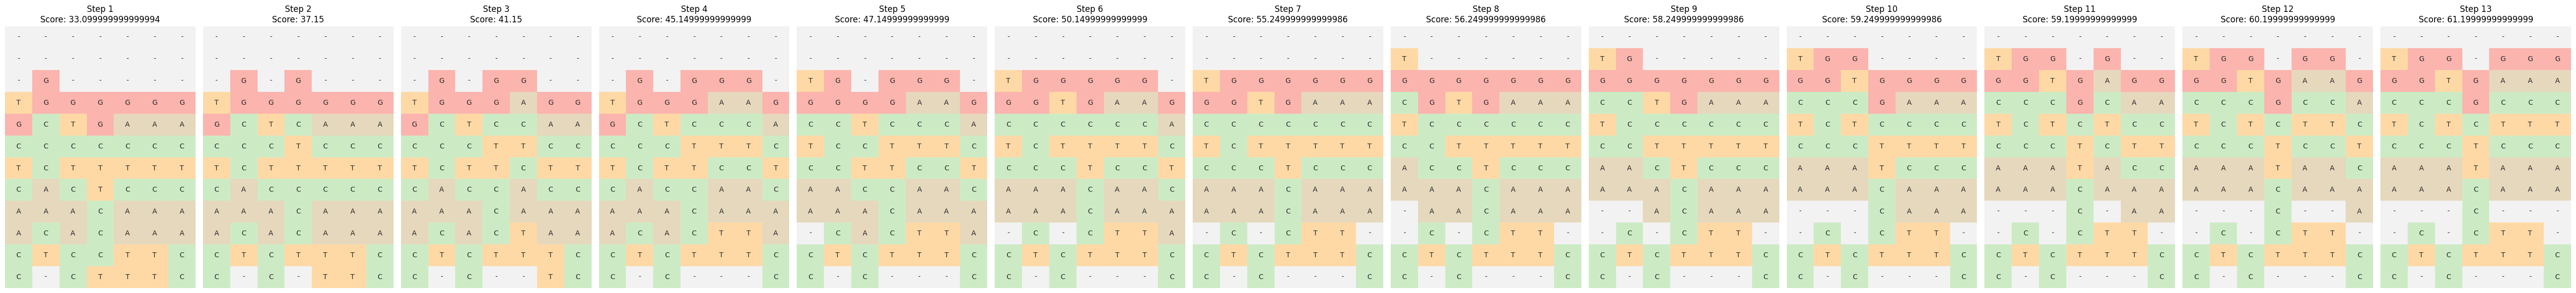

In [23]:
updated_puzzle = puzzle.apply_all_steps()

In [24]:
puzzle.steps

[(2, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (1, 2),
 (3, 2),
 (7, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (7, 3)]

In [25]:
#my code team error 404


# Install TensorFlow
conda install tensorflow

SyntaxError: invalid syntax (<ipython-input-25-f5b319c79a50>, line 5)

In [26]:
pip install tensorflow


In [27]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset
train_df = pd.read_pickle("/content/train_data.pickle")

# Preprocess the data
def preprocess_data(train_df):
    states = train_df['start'].tolist()
    actions = train_df['moves'].tolist()
    rewards = train_df['score'].tolist()

    # Encode states (example: one-hot encoding)
    def encode_state(sequence):
        nucleotides = ['A', 'T', 'C', 'G', '-']  # Include all possible characters
        encoding = np.zeros((len(sequence), len(nucleotides)))
        for i, char in enumerate(sequence):
            if char in nucleotides:  # Only encode valid characters
                encoding[i, nucleotides.index(char)] = 1
            else:
                # Handle unknown characters (e.g., skip or map to a default value)
                pass
        return encoding.flatten()  # Flatten to 1D array

    # Pad sequences to a fixed length
    max_length = max(len(seq) for seq in states)
    encoded_states = [encode_state(seq) for seq in states]
    encoded_states = pad_sequences(encoded_states, maxlen=max_length, padding='post', dtype='float32')

    # Encode actions (example: assign unique integers)
    unique_actions = list(set([move for sublist in actions for move in sublist]))
    action_to_index = {action: i for i, action in enumerate(unique_actions)}
    encoded_actions = [[action_to_index.get(move, -1) for move in sublist] for sublist in actions]

    return encoded_states, encoded_actions, rewards

# Preprocess the dataset
encoded_states, encoded_actions, rewards = preprocess_data(train_df)

# DQN Hyperparameters
state_size = encoded_states.shape[1]  # Size of the state vector
action_size = len(set([action for sublist in encoded_actions for action in sublist]))  # Number of unique actions
batch_size = 32
episodes = 1000
memory = deque(maxlen=2000)
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001

# Build the DQN model
model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu'))  # Input shape is (state_size,)
model.add(Dense(24, activation='relu'))
model.add(Dense(action_size, activation='linear'))
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([sample[0] for sample in minibatch])
        next_states = np.array([sample[3] for sample in minibatch])

        # Reshape states and next_states to (batch_size, state_size)
        states = np.reshape(states, (batch_size, self.state_size))
        next_states = np.reshape(next_states, (batch_size, self.state_size))

        targets = self.model.predict(states, verbose=0)
        next_q_values = self.model.predict(next_states, verbose=0)
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            if done:
                targets[i][action] = reward
            else:
                targets[i][action] = reward + self.gamma * np.amax(next_q_values[i])
        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize the agent
agent = DQNAgent(state_size, action_size)

# Train the agent
for e in range(episodes):
    state = encoded_states[e % len(encoded_states)]  # Cycle through states
    state = np.reshape(state, [1, state_size])  # Reshape to (1, state_size)
    for step in range(len(encoded_actions[e % len(encoded_actions)])):
        action = agent.act(state)
        next_state = encoded_states[(e + 1) % len(encoded_states)]
        next_state = np.reshape(next_state, [1, state_size])  # Reshape to (1, state_size)
        reward = rewards[e % len(rewards)]
        done = step == len(encoded_actions[e % len(encoded_actions)]) - 1
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print(f"Episode: {e}/{episodes}, Score: {reward}, Epsilon: {agent.epsilon}")
            break
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Save the trained model
model.save("dqn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode: 0/1000, Score: 18.0, Epsilon: 1.0
Episode: 1/1000, Score: 26.0, Epsilon: 1.0
Episode: 2/1000, Score: 15.0, Epsilon: 1.0
Episode: 3/1000, Score: 49.0, Epsilon: 1.0
Episode: 4/1000, Score: 11.0, Epsilon: 1.0
Episode: 5/1000, Score: 48.0, Epsilon: 1.0
Episode: 6/1000, Score: 108.0, Epsilon: 0.995
Episode: 7/1000, Score: 31.0, Epsilon: 0.990025
Episode: 8/1000, Score: 13.0, Epsilon: 0.985074875
Episode: 9/1000, Score: 12.0, Epsilon: 0.9801495006250001
Episode: 10/1000, Score: 25.0, Epsilon: 0.9752487531218751
Episode: 11/1000, Score: 31.0, Epsilon: 0.9703725093562657
Episode: 12/1000, Score: 17.0, Epsilon: 0.9655206468094844
Episode: 13/1000, Score: 28.0, Epsilon: 0.960693043575437
Episode: 14/1000, Score: 19.0, Epsilon: 0.9558895783575597
Episode: 15/1000, Score: 11.0, Epsilon: 0.9511101304657719
Episode: 16/1000, Score: 28.0, Epsilon: 0.946354579813443
Episode: 17/1000, Score: 20.0, Epsilon: 0.9416228069143757
Episode: 18/1000, Score: 30.0, Epsilon: 0.9369146928798039
Episode: 1

In [ ]:

model.summary()

In [ ]:
import matplotlib.pyplot as plt

# Store rewards during training
episode_rewards = []

# Modify the training loop to store rewards
for e in range(episodes):
    episode_reward = 0
    state = encoded_states[e % len(encoded_states)]
    state = np.reshape(state, [1, state_size])
    for step in range(len(encoded_actions[e % len(encoded_actions)])):
        action = agent.act(state)
        next_state = encoded_states[(e + 1) % len(encoded_states)]
        next_state = np.reshape(next_state, [1, state_size])
        reward = rewards[e % len(rewards)]
        done = step == len(encoded_actions[e % len(encoded_actions)]) - 1
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        episode_reward += reward
        if done:
            break
    episode_rewards.append(episode_reward)
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Plot rewards over episodes
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.show()

In [ ]:
pip install matplotlib

In [ ]:
# Store losses during training
losses = []

# Modify the replay method to store losses
def replay(self, batch_size):
    if len(self.memory) < batch_size:
        return
    minibatch = random.sample(self.memory, batch_size)
    states = np.array([sample[0] for sample in minibatch])
    next_states = np.array([sample[3] for sample in minibatch])
    states = np.reshape(states, (batch_size, self.state_size))
    next_states = np.reshape(next_states, (batch_size, self.state_size))
    targets = self.model.predict(states, verbose=0)
    next_q_values = self.model.predict(next_states, verbose=0)
    for i, (state, action, reward, next_state, done) in enumerate(minibatch):
        if done:
            targets[i][action] = reward
        else:
            targets[i][action] = reward + self.gamma * np.amax(next_q_values[i])
    history = self.model.fit(states, targets, epochs=1, verbose=0)
    losses.append(history.history['loss'][0])
    if self.epsilon > self.epsilon_min:
        self.epsilon *= self.epsilon_decay

# Plot losses over training steps
plt.plot(losses)


Training metrics


In [ ]:
import numpy as np
import pandas as pd
import random
from collections import deque, Counter
import matplotlib.pyplot as plt  # Add this import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset
train_df = pd.read_pickle("C:/Users/Rewan/Downloads/train_data.pickle")

# Preprocess the data
def preprocess_data(train_df):
    states = train_df['start'].tolist()
    actions = train_df['moves'].tolist()
    rewards = train_df['score'].tolist()

    # Encode states (example: one-hot encoding)
    def encode_state(sequence):
        nucleotides = ['A', 'T', 'C', 'G', '-']
        encoding = np.zeros((len(sequence), len(nucleotides)))
        for i, char in enumerate(sequence):
            if char in nucleotides:
                encoding[i, nucleotides.index(char)] = 1
        return encoding.flatten()

    # Pad sequences to a fixed length
    max_length = max(len(seq) for seq in states)
    encoded_states = [encode_state(seq) for seq in states]
    encoded_states = pad_sequences(encoded_states, maxlen=max_length, padding='post', dtype='float32')

    # Encode actions (example: assign unique integers)
    unique_actions = list(set([move for sublist in actions for move in sublist]))
    action_to_index = {action: i for i, action in enumerate(unique_actions)}
    encoded_actions = [[action_to_index.get(move, -1) for move in sublist] for sublist in actions]

    return encoded_states, encoded_actions, rewards

# Preprocess the dataset
encoded_states, encoded_actions, rewards = preprocess_data(train_df)

# DQN Hyperparameters
state_size = encoded_states.shape[1]
action_size = len(set([action for sublist in encoded_actions for action in sublist]))
batch_size = 32
episodes = 1000
memory = deque(maxlen=2000)
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001

# Build the DQN model
model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(action_size, activation='linear'))
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([sample[0] for sample in minibatch])
        next_states = np.array([sample[3] for sample in minibatch])
        states = np.reshape(states, (batch_size, self.state_size))
        next_states = np.reshape(next_states, (batch_size, self.state_size))
        targets = self.model.predict(states, verbose=0)
        next_q_values = self.model.predict(next_states, verbose=0)
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            if done:
                targets[i][action] = reward
            else:
                targets[i][action] = reward + self.gamma * np.amax(next_q_values[i])
        history = self.model.fit(states, targets, epochs=1, verbose=0)
        losses.append(history.history['loss'][0])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize the agent
agent = DQNAgent(state_size, action_size)

# Lists to store metrics
episode_rewards = []
losses = []
epsilon_history = []
actions_chosen = []
q_values_history = []

# Train the agent
for e in range(episodes):
    episode_reward = 0
    state = encoded_states[e % len(encoded_states)]
    state = np.reshape(state, [1, state_size])
    for step in range(len(encoded_actions[e % len(encoded_actions)])):
        action = agent.act(state)
        next_state = encoded_states[(e + 1) % len(encoded_states)]
        next_state = np.reshape(next_state, [1, state_size])
        reward = rewards[e % len(rewards)]
        done = step == len(encoded_actions[e % len(encoded_actions)]) - 1
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        episode_reward += reward
        actions_chosen.append(action)
        if done:
            break
    episode_rewards.append(episode_reward)
    epsilon_history.append(agent.epsilon)
    q_values = model.predict(np.reshape(encoded_states[e % len(encoded_states)], [1, state_size]), verbose=0)[0]
    q_values_history.append(q_values)
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Print and plot metrics
print("Average Reward per Episode:", np.mean(episode_rewards))
print("Cumulative Reward:", np.sum(episode_rewards))
print("Final Epsilon:", agent.epsilon)
print("Action Distribution:", Counter(actions_chosen))

# Plot metrics
plt.figure(figsize=(15, 10))

# Average Reward per Episode
plt.subplot(2, 3, 1)
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode")

# Cumulative Reward
plt.subplot(2, 3, 2)
plt.plot(np.cumsum(episode_rewards))
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes")

# Q-Value Convergence
plt.subplot(2, 3, 3)
plt.plot([q[0] for q in q_values_history])
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.title("Q-Value Convergence for Action 0")

# Training Loss
plt.subplot(2, 3, 4)
plt.plot(losses)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")

# Exploration Rate (Epsilon)
plt.subplot(2, 3, 5)
plt.plot(epsilon_history)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Exploration Rate (Epsilon) Over Episodes")

# Action Distribution
plt.subplot(2, 3, 6)
action_counts = Counter(actions_chosen)
plt.bar(action_counts.keys(), action_counts.values())
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Action Distribution")

plt.tight_layout()
plt.show()

Testing metrics


In [ ]:
import numpy as np
import pandas as pd
import random
from collections import deque, Counter
import matplotlib.pyplot as plt  # Add this import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset
test_df = pd.read_pickle("/content/test_data.pickle")

# Preprocess the data
def preprocess_data(test_df):
    states = train_df['start'].tolist()
    actions = train_df['moves'].tolist()
    rewards = train_df['score'].tolist()

    # Encode states (example: one-hot encoding)
    def encode_state(sequence):
        nucleotides = ['A', 'T', 'C', 'G', '-']
        encoding = np.zeros((len(sequence), len(nucleotides)))
        for i, char in enumerate(sequence):
            if char in nucleotides:
                encoding[i, nucleotides.index(char)] = 1
        return encoding.flatten()

    # Pad sequences to a fixed length
    max_length = max(len(seq) for seq in states)
    encoded_states = [encode_state(seq) for seq in states]
    encoded_states = pad_sequences(encoded_states, maxlen=max_length, padding='post', dtype='float32')

    # Encode actions (example: assign unique integers)
    unique_actions = list(set([move for sublist in actions for move in sublist]))
    action_to_index = {action: i for i, action in enumerate(unique_actions)}
    encoded_actions = [[action_to_index.get(move, -1) for move in sublist] for sublist in actions]

    return encoded_states, encoded_actions, rewards

# Preprocess the dataset
encoded_states, encoded_actions, rewards = preprocess_data(test_df)

# DQN Hyperparameters
state_size = encoded_states.shape[1]
action_size = len(set([action for sublist in encoded_actions for action in sublist]))
batch_size = 32
episodes = 1000
memory = deque(maxlen=2000)
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001

# Build the DQN model
model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(action_size, activation='linear'))
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.model = model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([sample[0] for sample in minibatch])
        next_states = np.array([sample[3] for sample in minibatch])
        states = np.reshape(states, (batch_size, self.state_size))
        next_states = np.reshape(next_states, (batch_size, self.state_size))
        targets = self.model.predict(states, verbose=0)
        next_q_values = self.model.predict(next_states, verbose=0)
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            if done:
                targets[i][action] = reward
            else:
                targets[i][action] = reward + self.gamma * np.amax(next_q_values[i])
        history = self.model.fit(states, targets, epochs=1, verbose=0)
        losses.append(history.history['loss'][0])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize the agent
agent = DQNAgent(state_size, action_size)

# Lists to store metrics
episode_rewards = []
losses = []
epsilon_history = []
actions_chosen = []
q_values_history = []

# Train the agent
for e in range(episodes):
    episode_reward = 0
    state = encoded_states[e % len(encoded_states)]
    state = np.reshape(state, [1, state_size])
    for step in range(len(encoded_actions[e % len(encoded_actions)])):
        action = agent.act(state)
        next_state = encoded_states[(e + 1) % len(encoded_states)]
        next_state = np.reshape(next_state, [1, state_size])
        reward = rewards[e % len(rewards)]
        done = step == len(encoded_actions[e % len(encoded_actions)]) - 1
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        episode_reward += reward
        actions_chosen.append(action)
        if done:
            break
    episode_rewards.append(episode_reward)
    epsilon_history.append(agent.epsilon)
    q_values = model.predict(np.reshape(encoded_states[e % len(encoded_states)], [1, state_size]), verbose=0)[0]
    q_values_history.append(q_values)
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Print and plot metrics
print("Average Reward per Episode:", np.mean(episode_rewards))
print("Cumulative Reward:", np.sum(episode_rewards))
print("Final Epsilon:", agent.epsilon)
print("Action Distribution:", Counter(actions_chosen))

# Plot metrics
plt.figure(figsize=(15, 10))

# Average Reward per Episode
plt.subplot(2, 3, 1)
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode")

# Cumulative Reward
plt.subplot(2, 3, 2)
plt.plot(np.cumsum(episode_rewards))
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes")

# Q-Value Convergence
plt.subplot(2, 3, 3)
plt.plot([q[0] for q in q_values_history])
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.title("Q-Value Convergence for Action 0")

# Training Loss
plt.subplot(2, 3, 4)
plt.plot(losses)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")

# Exploration Rate (Epsilon)
plt.subplot(2, 3, 5)
plt.plot(epsilon_history)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Exploration Rate (Epsilon) Over Episodes")

# Action Distribution
plt.subplot(2, 3, 6)
action_counts = Counter(actions_chosen)
plt.bar(action_counts.keys(), action_counts.values())
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Action Distribution")

plt.tight_layout()
plt.show()

This is where we run the model to test it!! and get the metrics


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

# Load your dataset
test_df = pd.read_pickle("C:/Users/Rewan/Downloads/test_data.pickle")

# Debug: Print column names to verify
print("Columns in test_df:", test_df.columns)

# Preprocess the data
def preprocess_data(test_df):
    # Check if required columns exist
    required_columns = ['start', 'accepted_pair']  # Updated column names
    for col in required_columns:
        if col not in test_df.columns:
            raise KeyError(f"Column '{col}' not found in test_df. Available columns: {test_df.columns}")

    states = test_df['start'].tolist()  # Use 'start' as the state column
    accepted_pairs = test_df['accepted_pair'].tolist()  # Use 'accepted_pair' as the accepted actions column

    # Encode states (example: one-hot encoding)
    def encode_state(sequence):
        nucleotides = ['A', 'T', 'C', 'G', '-']
        encoding = np.zeros((len(sequence), len(nucleotides)))
        for i, char in enumerate(sequence):
            if char in nucleotides:
                encoding[i, nucleotides.index(char)] = 1
        return encoding.flatten()

    # Pad sequences to a fixed length
    max_length = max(len(seq) for seq in states)
    encoded_states = [encode_state(seq) for seq in states]
    encoded_states = pad_sequences(encoded_states, maxlen=max_length, padding='post', dtype='float32')

    # Flatten the `accepted_pair` column and extract unique actions
    all_accepted_actions = [action for sublist in accepted_pairs for action in sublist]
    unique_actions = list(set(all_accepted_actions))  # Get unique actions
    action_to_index = {action: i for i, action in enumerate(unique_actions)}

    # Encode accepted actions for each state
    encoded_accepted = [[action_to_index.get(action, -1) for action in sublist] for sublist in accepted_pairs]

    return encoded_states, encoded_accepted, unique_actions

# Preprocess the dataset
try:
    encoded_states, encoded_accepted, unique_actions = preprocess_data(test_df)
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Load the trained model
try:
    # If the model uses a custom loss function, register it here
    from tensorflow.keras.losses import MeanSquaredError
    custom_objects = {"mse": MeanSquaredError()}  # Replace with your custom loss function if needed
    model = load_model(r"C:\Users\rewan\Downloads\dqn_model.h5", custom_objects=custom_objects)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Test the model
def test_model(model, encoded_states, encoded_accepted, unique_actions):
    total_reward = 0
    predicted_actions = []
    q_values_history = []
    correct_predictions = 0  # Track correct predictions

    for i in range(len(encoded_states)):
        state = encoded_states[i]
        state = np.reshape(state, [1, -1])  # Reshape to (1, state_size)

        # Predict the action
        action_values = model.predict(state, verbose=0)
        action = np.argmax(action_values[0])
        predicted_actions.append(action)

        # Compare with accepted actions (if available)
        accepted_actions = encoded_accepted[i]
        if action in accepted_actions:  # Check if predicted action is in accepted actions
            correct_predictions += 1

        # Store Q-values for analysis
        q_values_history.append(action_values[0].tolist())  # Convert to list for JSON serialization

        print(f"State {i + 1}: Predicted Action = {action}, Accepted Actions = {accepted_actions}")

    accuracy = correct_predictions / len(encoded_states) if len(encoded_states) > 0 else 0
    print(f"Total Correct Predictions: {correct_predictions}")
    print(f"Prediction Accuracy: {accuracy * 100:.2f}%")
    return predicted_actions, q_values_history, correct_predictions

# Run the test
predicted_actions, q_values_history, correct_predictions = test_model(model, encoded_states, encoded_accepted, unique_actions)

# Calculate evaluation metrics
accuracy = correct_predictions / len(encoded_states)
action_distribution = dict(Counter(predicted_actions))  # Convert Counter to dict for JSON serialization

# Print metrics
print("\n=== Metrics Evaluation ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Total Correct Predictions: {correct_predictions}")
print(f"Action Distribution: {action_distribution}")

# Plot metrics
plt.figure(figsize=(15, 10))

# Q-Value Convergence for Action 0
plt.subplot(2, 2, 1)
plt.plot([q[0] for q in q_values_history])
plt.xlabel("State")
plt.ylabel("Q-Value")
plt.title("Q-Value Convergence for Action 0")

# Action Distribution
plt.subplot(2, 2, 2)
action_counts = Counter(predicted_actions)
plt.bar(action_counts.keys(), action_counts.values())
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Action Distribution")

# Cumulative Correct Predictions
plt.subplot(2, 2, 3)
cumulative_correct = np.cumsum([1 if p in a else 0 for p, a in zip(predicted_actions, encoded_accepted)])
plt.plot(cumulative_correct)
plt.xlabel("State")
plt.ylabel("Cumulative Correct Predictions")
plt.title("Cumulative Correct Predictions Over States")

# Reward Distribution (if rewards are available)
plt.subplot(2, 2, 4)
plt.hist([1 if p in a else 0 for p, a in zip(predicted_actions, encoded_accepted)], bins=20)
plt.xlabel("Correct (1) / Incorrect (0)")
plt.ylabel("Frequency")
plt.title("Prediction Accuracy Distribution")

plt.tight_layout()
plt.show()

# Export metrics and processed data
def export_metrics_and_data(encoded_states, encoded_accepted, predicted_actions, q_values_history, correct_predictions, accuracy, action_distribution):
    # Save metrics to a JSON file
    metrics = {
        "accuracy": accuracy,
        "total_correct_predictions": correct_predictions,
        "action_distribution": action_distribution,
        "predicted_actions": predicted_actions,
        "q_values_history": q_values_history
    }
    with open("metrics.json", "w") as f:
        json.dump(metrics, f, indent=4)
    print("Metrics saved to 'metrics.json'.")

    # Save processed data to a CSV file
    processed_data = pd.DataFrame({
        "Encoded_States": list(encoded_states),
        "Encoded_Accepted": encoded_accepted,
        "Predicted_Actions": predicted_actions
    })
    processed_data.to_csv("processed_data.csv", index=False)
    print("Processed data saved to 'processed_data.csv'.")

# Export metrics and processed data
export_metrics_and_data(encoded_states, encoded_accepted, predicted_actions, q_values_history, correct_predictions, accuracy, action_distribution)